In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm as tq
import cv2
import random as rn
import os
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder as le
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from matplotlib import style
%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid' ,color_codes=True)



In [6]:
def make_train_data(label,DIR):
    for img in tq(os.listdir(DIR)):
        try:
            path = os.path.join(DIR,img)
            img = cv2.imread(path,cv2.IMREAD_COLOR)
            img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
            X.append(np.array(img))
            Z.append(str(label))
        except:
            pass
        
def assign_label(img,label):
    return label

In [7]:
X=[] #contains images as a array
Z=[] #contains the labels
IMG_SIZE=100


nor='C:/Users/HP/Desktop/Projects/Deep Learning/Pothole Detection/dataset/normal'
pot='C:/Users/HP/Desktop/Projects/Deep Learning/Pothole Detection/dataset/potholes'

make_train_data('NORMAL',nor)
make_train_data('POTHOLES',pot)

  0%|          | 0/352 [00:00<?, ?it/s]

  0%|          | 0/329 [00:00<?, ?it/s]

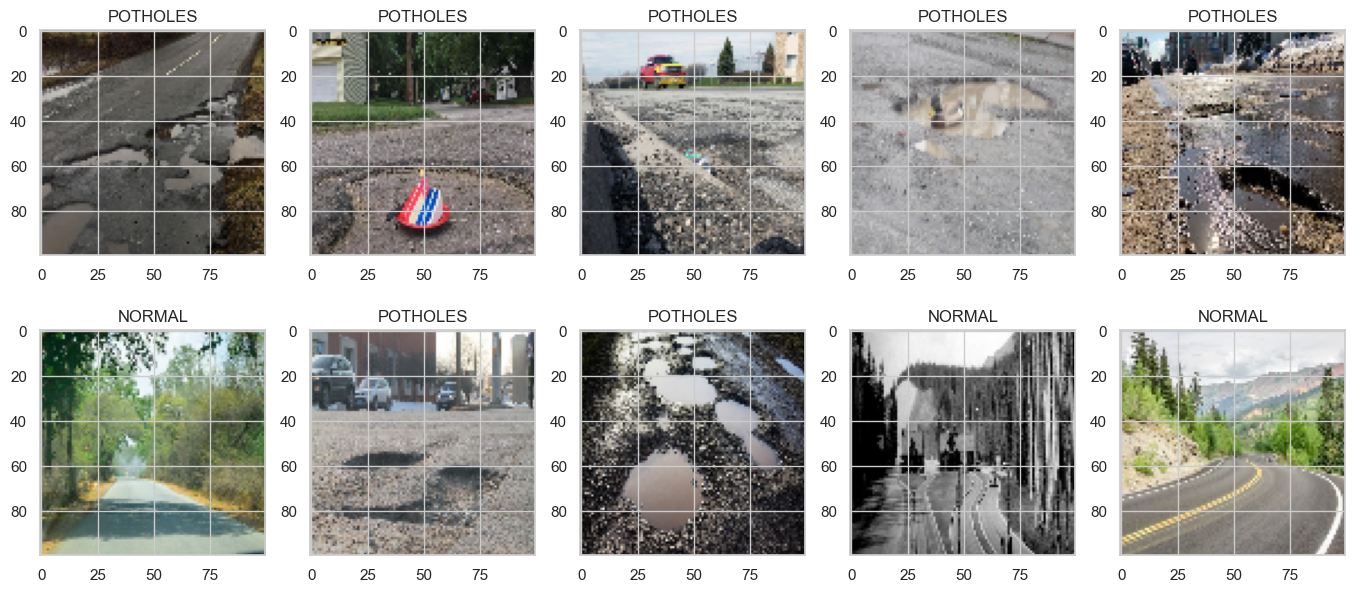

In [8]:
fig,ax=plt.subplots(2,5)
plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0)
fig.set_size_inches(15,15)

for i in range(2):
    for j in range (5):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l][:,:,::-1])
        ax[i,j].set_title(Z[l])
        ax[i,j].set_aspect('equal')

In [9]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
Y=[] # binary representation of labels
Y=le.fit_transform(Z)
Y=to_categorical(Y,2)

X=np.array(X)
X=X/255.0

In [10]:
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of X: (680, 100, 100, 3)
Shape of Y: (680, 2)


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import time

NAME= f'prediction-{int(time.time())}'

In [16]:
model= Sequential()

model.add(Conv2D(64, (3,3), activation='relu', input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
#model.add(Dense(2, activation='softmax'))0

In [17]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
logdir='logs'
tensorboard_callback= tf.keras.callbacks.TensorBoard(log_dir=logdir)
history=model.fit(X_train, Y_train, epochs= 10, validation_split=0.1, batch_size=32,callbacks=[tensorboard_callback] )  

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 408ms/step - accuracy: 0.5539 - loss: 1.5199 - val_accuracy: 0.5636 - val_loss: 0.6853
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 362ms/step - accuracy: 0.7145 - loss: 0.6123 - val_accuracy: 0.3455 - val_loss: 0.8468
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 354ms/step - accuracy: 0.7751 - loss: 0.4941 - val_accuracy: 0.7818 - val_loss: 0.5117
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 357ms/step - accuracy: 0.8758 - loss: 0.3143 - val_accuracy: 0.8182 - val_loss: 0.4753
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 349ms/step - accuracy: 0.8791 - loss: 0.2927 - val_accuracy: 0.8909 - val_loss: 0.3347
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 350ms/step - accuracy: 0.9168 - loss: 0.2110 - val_accuracy: 0.8000 - val_loss: 0.5736
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 348ms/step - accuracy: 0.9055 - loss: 0.2084 - val_accuracy: 0.8364 - val_loss: 0.5499
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 350ms/step - accuracy: 0.9035 - loss: 0.2535 - val_accuracy: 0

In [19]:
loss,accuracy= model.evaluate(X_test, Y_test)
print('Test accuracy: {:2.2f}%'.format(accuracy*100))
print('Test loss {:2.2f}%'.format(loss*100))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.8195 - loss: 0.4007
Test accuracy: 85.29%
Test loss 35.49%


In [20]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

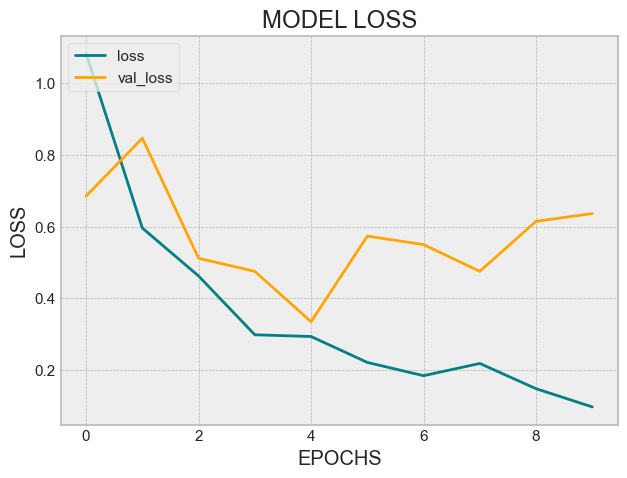

In [21]:
plt.style.use('bmh')
fig=plt.figure()
plt.plot(history.history['loss'],color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
plt.title('MODEL LOSS')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.legend(loc='upper left')
plt.show()

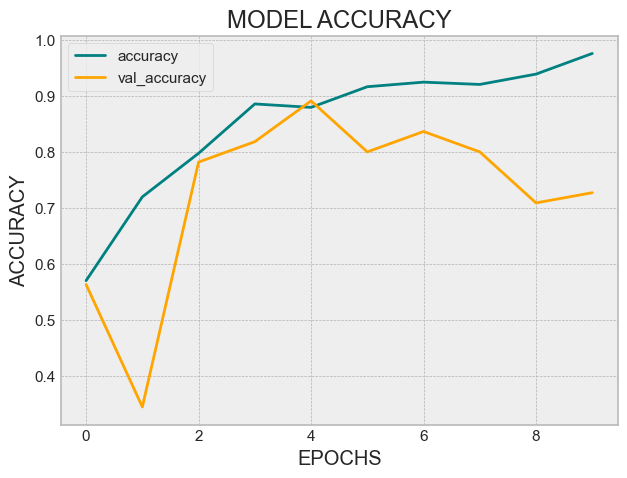

In [22]:
plt.style.use('bmh')

fig=plt.figure()
plt.plot(history.history['accuracy'],color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
plt.title('MODEL ACCURACY')
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.legend(loc='upper left')
plt.show()

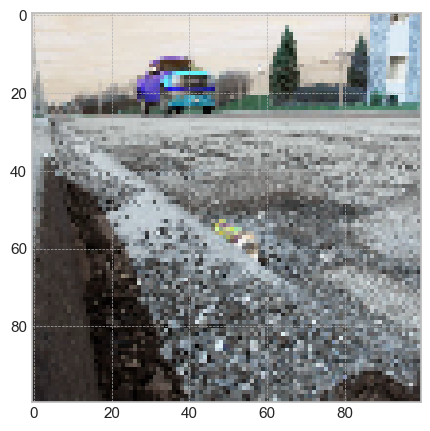

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
[[1. 0.]]
Plain Road


In [23]:

import random
indx2= random.randint(0, len(Y_test))
plt.imshow(X_test[indx2, :])
plt.show()

Y_pred= np.round(model.predict(X_test[indx2, :].reshape(1,100,100,3)))
print(Y_pred)
if Y_pred[0][0] == 1:
  print("Plain Road")
else:
    print("Pothole Road")